<a href="https://colab.research.google.com/github/zibro011/DataScience-Lab10/blob/main/Lab10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**INET 4061 Lab 10** <br>
**Adelaide Zibrowski** <br>
**November 16, 2021** <br>


#Overview
In this lab we will get a deeper understanding of climate change, and, more specifically, its effect on Arctic and Antarctic sea ice. We have a time series data set from the National Snow and Ice Data Center containing measurements of ice area thickness measured on a monthly basis. Using two time series models, ARIMA and Holt-Winters we will evaluate the data to prove historical trends and make predictions for the future.

#Data

In [ ]:
pip install pmdarima

In [ ]:
import pandas as pd
import numpy as np
from scipy import stats
from matplotlib import pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [ ]:
url1 = 'https://raw.githubusercontent.com/zibro011/lab10data/8d5ee46441e4628ec143e55b09a6e0a3bea3e05e/drive-download-20211117T010350Z-001/N_01_extent_v3.0.csv'
url2 = 'https://raw.githubusercontent.com/zibro011/lab10data/8d5ee46441e4628ec143e55b09a6e0a3bea3e05e/drive-download-20211117T010350Z-001/N_02_extent_v3.0.csv'
url3 = 'https://raw.githubusercontent.com/zibro011/lab10data/8d5ee46441e4628ec143e55b09a6e0a3bea3e05e/drive-download-20211117T010350Z-001/N_03_extent_v3.0.csv'
url4 = 'https://raw.githubusercontent.com/zibro011/lab10data/8d5ee46441e4628ec143e55b09a6e0a3bea3e05e/drive-download-20211117T010350Z-001/N_04_extent_v3.0.csv'
url5 = 'https://raw.githubusercontent.com/zibro011/lab10data/8d5ee46441e4628ec143e55b09a6e0a3bea3e05e/drive-download-20211117T010350Z-001/N_05_extent_v3.0.csv'
url6 = 'https://raw.githubusercontent.com/zibro011/lab10data/8d5ee46441e4628ec143e55b09a6e0a3bea3e05e/drive-download-20211117T010350Z-001/N_06_extent_v3.0.csv'
url7 = 'https://raw.githubusercontent.com/zibro011/lab10data/8d5ee46441e4628ec143e55b09a6e0a3bea3e05e/drive-download-20211117T010350Z-001/N_07_extent_v3.0.csv'
url8 = 'https://raw.githubusercontent.com/zibro011/lab10data/8d5ee46441e4628ec143e55b09a6e0a3bea3e05e/drive-download-20211117T010350Z-001/N_08_extent_v3.0.csv'
url9 = 'https://raw.githubusercontent.com/zibro011/lab10data/8d5ee46441e4628ec143e55b09a6e0a3bea3e05e/drive-download-20211117T010350Z-001/N_09_extent_v3.0.csv'
url10 = 'https://raw.githubusercontent.com/zibro011/lab10data/8d5ee46441e4628ec143e55b09a6e0a3bea3e05e/drive-download-20211117T010350Z-001/N_10_extent_v3.0.csv'
url11 = 'https://raw.githubusercontent.com/zibro011/lab10data/8d5ee46441e4628ec143e55b09a6e0a3bea3e05e/drive-download-20211117T010350Z-001/N_11_extent_v3.0.csv'
url12 = 'https://raw.githubusercontent.com/zibro011/lab10data/8d5ee46441e4628ec143e55b09a6e0a3bea3e05e/drive-download-20211117T010350Z-001/N_12_extent_v3.0.csv'



In [ ]:
#Loading data into dataframe to be used,combine all 12 csv files into one dataframe so we have proper dataset with all 12 months
df = pd.concat(map(pd.read_csv,[url1,url2,url3,url4,url5,url6,url7,url8,url9,url10,url11,url12]))


#Exploratory Data Analysis (EDA)

In [ ]:
#remove the spaces that appear in column headings
df.columns = df.columns.str.replace(' ', '') 
#dropping bad rows from dataset
df = df[df['area'] != -9999.00]
#dropping columns we don't need
df=df.drop(['data-type','region','extent'], axis=1)
#create a unique time column to sort on
df["time"] = df["year"].apply(str) + "-" + df["mo"].apply(str).str.zfill(2)
#drop the old columns we don't need now
df=df.drop(['year', 'mo'], axis=1)
#make sure our new unique column is the index which is important for time series data (needs to be in order!)
df = df.set_index('time')
#sort it!
df = df.sort_values(by=['time'])
#make sure it's in order
df.head(50)

,area
time,
1978-11,9.04
1978-12,10.90
1979-01,12.41
1979-02,13.18
1979-03,13.21
1979-04,12.53
1979-05,11.11
1979-06,9.34
1979-07,6.69


In [ ]:
df.tail()

,area
time,
2021-06,8.38
2021-07,5.55
2021-08,3.77
2021-09,3.43
2021-10,5.41


In [ ]:
df.shape

(513, 1)

In [ ]:
#drop any rows that contain a null value in any column
df= df.dropna(how = 'any', axis = 0)
df.shape

(513, 1)

In [ ]:
#drop any rows that contain an outlier in any column
#here I define an outlier as a value that is more than 3 standard deviations away from the mean
col = df.iloc[:,1:]
df[(np.abs(stats.zscore(col)) < 3)]
df.shape

(513, 1)

In [ ]:
df.nunique()

area    396
dtype: int64

In [ ]:
df.describe()

,area
count,513.000000
mean,9.272300
std,3.246864
min,2.410000
25%,6.270000
50%,9.950000
75%,12.290000
max,13.900000


Text(0, 0.5, 'Sea Ice Area (in millions of square kilometers)')

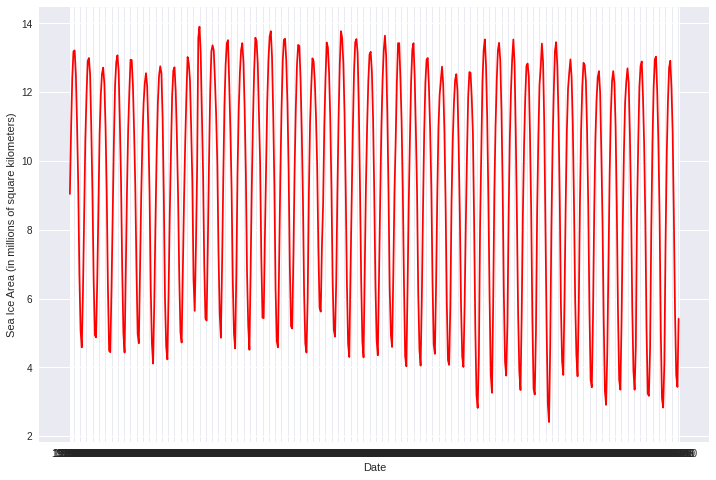

In [ ]:
fig = plt.figure(figsize=(12,8))
plt.style.use('seaborn')
plt.plot(df.index, df['area'], 'r')
plt.xlabel('Date')
plt.ylabel('Sea Ice Area (in millions of square kilometers)')

From the code above, we can see that we have a stationary time series data set containing 513 rows and one column. We have 513 dates ranging from November 1978 to October 2021 which each have a corresponding ice area value in millions of square kilometers. We drop any rows including null values or outliers, but we can see from the returned shape that no rows needed to be dropped. Finally, the output of our describe functions shows us that we have a minimum value of 2.41 million square kilometers, a maximum of 13.9 million square kilometers, and an average of 9.27 million square kilometers.

##ACF
Autocorrelation measures what is known as the moving average or the strength of the relationship between two values. The blue shaded area in the plot below corresponds to the confidence level which is 95% by default. Therefore, any lines that reach outside the blue shaded area can be considered, with 95% certainty, to have a significant impact on following values. The number of bars that exceed the shaded region generally correspond to the order of the moving average (q in ARIMA). <br>

Information in this section was gathered from Exercie 10 and https://medium.com/@krzysztofdrelczuk/acf-autocorrelation-function-simple-explanation-with-python-example-492484c32711 and https://machinelearningmastery.com/gentle-introduction-autocorrelation-partial-autocorrelation/.

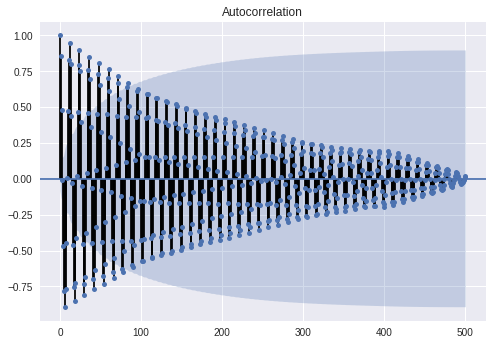

In [ ]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_acf(df, lags = 500)
plt.show()

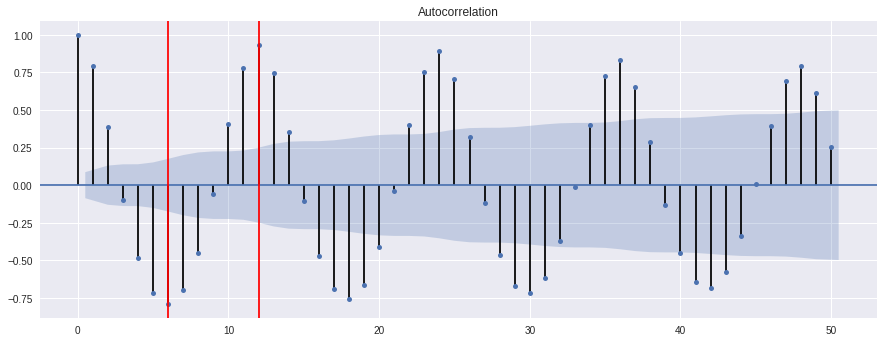

In [ ]:
fig = plt.figure(figsize=(15,12))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['area'].diff().dropna(), lags=50, ax=ax1)
plt.axvline(x=6, color ='r')
plt.axvline(x=12, color ='r')
plt.show()

Looking at the plots above, we can see that most of the values in the first 50 lags are outside the blue shaded region and therefore are statistically significant to us in terms of correlation with other values. However, we can also see that the number of statistically significant values starts to decrease as the number of lags increases. This makes sense intuitively because it makes sense that as data gets further apart in time, it becomes less correlated. Another piece of information we can notice is that the data seems to follow a 6 month cycle. I added two vertical lines at x = 6 and x = 12 so we can recognize and verify this cycle easier. Using ACF, I would use 3 as my moving average order beause the first three lines exceed the blue shaded region, but the fourth line does not.

##PACF
Partial Autocorrelation measures the direct relationship between two time series variables and ignores any indirect effects. Similarly to ACF, the value of the Partial Autocorrelation Formula (PACF) indicates to us whether a variable is valuable to our model or not. If the PACF is within the shaded blue region, that means there is no significant correlation between the two variables, so they will not be good predictors for one another. The number of bars that exceed the error lines generally correspond to the order of the auto regressive part (p in ARIMA).

Information in this section was gathered from Exercise 10 and https://machinelearningmastery.com/gentle-introduction-autocorrelation-partial-autocorrelation/.

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


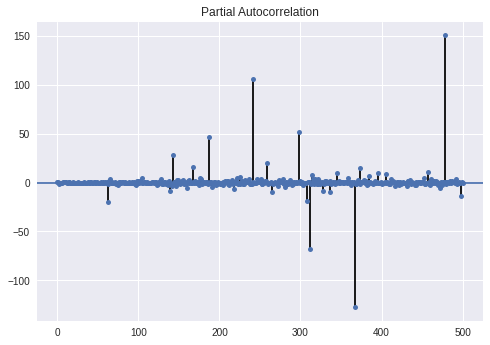

In [ ]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(df, lags = 500)
plt.show()

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


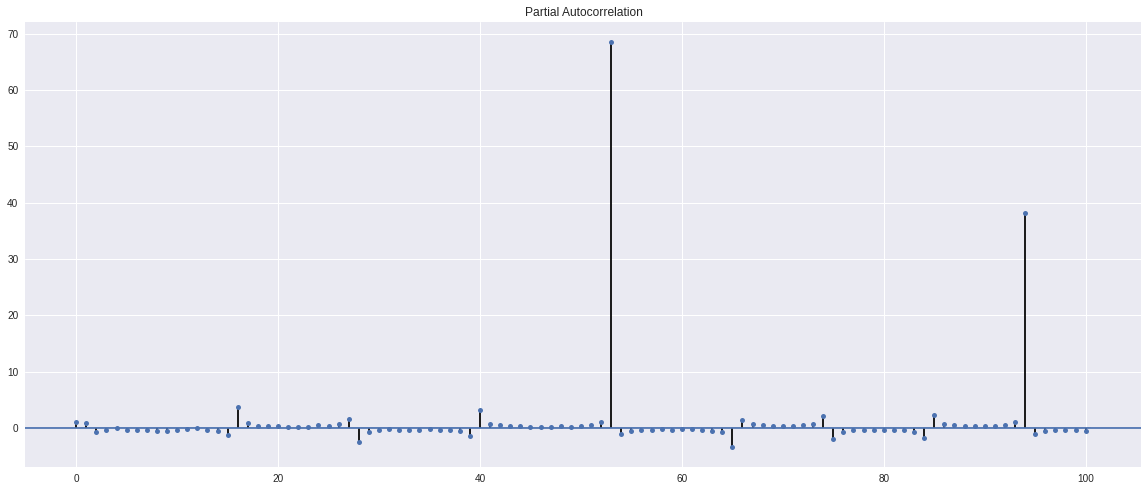

In [ ]:
fig = plt.figure(figsize=(20,18))
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['area'].diff().dropna(), lags=100, ax=ax2)
plt.show()

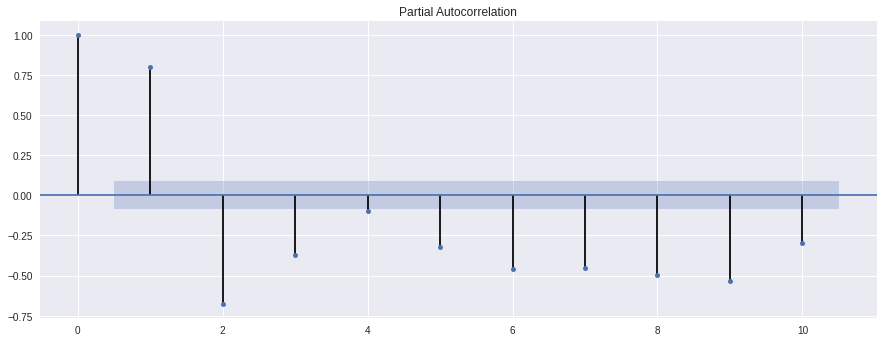

In [ ]:
fig = plt.figure(figsize=(15,12))
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['area'].diff().dropna(), lags=10, ax=ax2)
plt.show()

The plot above indicates that all of our values for the first 50 lags are statistically signifcant in terms of future value correlation because they all reach outside the blue shaded region. It is hard to read the plot with 100 lags, but it looks like it is about the same. This is different from the ACF plot because here our correlation is measured without indirect influences, and, therefore, it does not decrease with time. Using PACF, I would use 4 as my autoregressive order because the first 4 lines are significantly far from the shaded region, but the 5th line is just barely outside it.

##Time Chart 

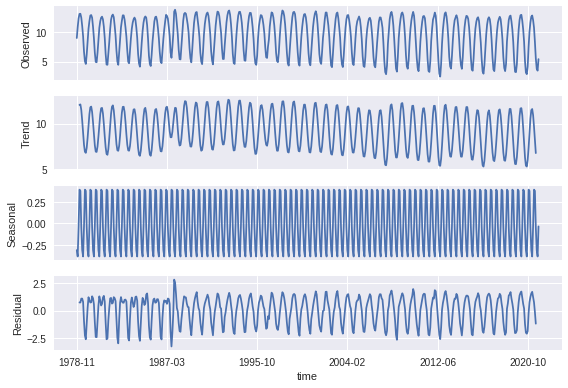

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
seasonal_decompose(df, model='additive', freq = 6).plot()
plt.show()

We can see from the seasonal decomposition plots above that our data does not follow a specific trend which makes sense as the area will fluctuate with the seasons. This idea is further enforced by our seasonality plot which shows that our data has intense seasonal fluctuations. Our residuals are fairly random but they definitely follow a pattern. After doing research, I have decided that this is not normal, but I am unsure of how to fix it in a timely manner. I think the correlation of our residuals alludes to the fact that information has been left out of seasonality. However, the residuals could actually be random but they look correlated because the plot is so small and I cannot find out how to enlarge it.

#Models
Below, I create and evaluate two models that are used for forecasting future time series data. In addition to plotting the predicted values versus the actual values for each model, I calculated the Root Mean Square Error using information from https://www.kite.com/python/answers/how-to-take-root-mean-square-error-(rmse)-in-python.

##ARIMA
Auto Regressive Integrated Moving Average (ARIMA) Models can be used to forecast future values from time series data.

In [ ]:
#build arima models changing p,d,q parameters using info from: https://www.machinelearningplus.com/time-series/arima-model-time-series-forecasting-python/ 
from statsmodels.tsa.arima_model import ARIMA
import pmdarima as pm
smodel = pm.auto_arima(df,test='adf',max_p=5, max_q=5, m=12,start_P=0, seasonal=True,d=None, D=1, trace=True,error_action='ignore',suppress_warnings=True, stepwise=True)

print(smodel.summary())

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,1,1)[12] intercept   : AIC=434.381, Time=5.51 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=1149.744, Time=0.15 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=676.452, Time=1.40 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=778.282, Time=1.70 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=1148.072, Time=0.06 sec
 ARIMA(2,0,2)(0,1,0)[12] intercept   : AIC=535.196, Time=1.35 sec
 ARIMA(2,0,2)(1,1,1)[12] intercept   : AIC=436.106, Time=7.67 sec
 ARIMA(2,0,2)(0,1,2)[12] intercept   : AIC=436.197, Time=15.78 sec
 ARIMA(2,0,2)(1,1,0)[12] intercept   : AIC=446.541, Time=4.22 sec
 ARIMA(2,0,2)(1,1,2)[12] intercept   : AIC=432.113, Time=28.81 sec
 ARIMA(2,0,2)(2,1,2)[12] intercept   : AIC=430.206, Time=31.00 sec
 ARIMA(2,0,2)(2,1,1)[12] intercept   : AIC=433.977, Time=25.54 sec
 ARIMA(1,0,2)(2,1,2)[12] intercept   : AIC=510.219, Time=18.29 sec
 ARIMA(2,0,1)(2,1,2)[12] intercept   : AIC=428.313, Time=24.33 sec
 ARIMA(2,0,1)(1,1,2)[12] 

The model that our algorithm ultimately chose was the ARIMA model of (3,0,0)(2,1,2) orders whose AIC is 427.208 and BIC is 460.941. 

In [ ]:
traindata, testdata = df.iloc[:371], df.iloc[371:]
traindata.head()

,area
time,
1978-11,9.04
1978-12,10.90
1979-01,12.41
1979-02,13.18
1979-03,13.21


In [ ]:
# Forecast
n_periods = 12
fitted, confint = smodel.predict(n_periods=n_periods, return_conf_int=True)


In [ ]:
ARIMAdf = df.copy()
ARIMAdf['prediction'] = ARIMA(df,order=(3,0,0)).fit().fittedvalues

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  The location of the key


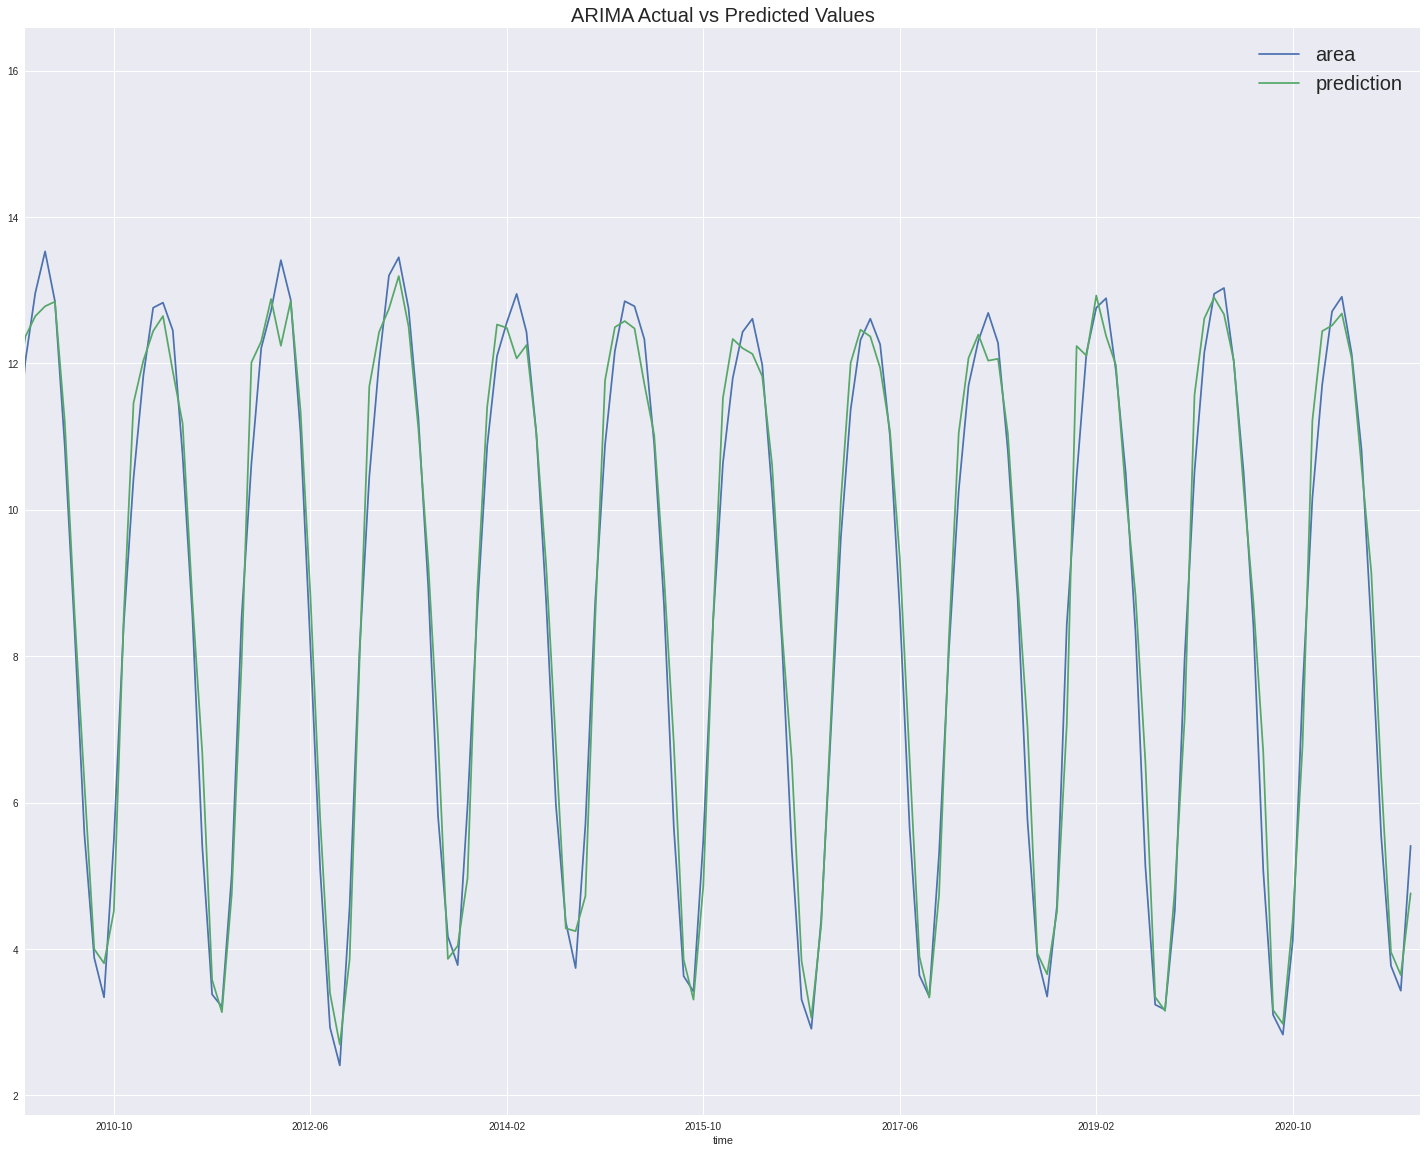

In [ ]:
ax1 = ARIMAdf[['area','prediction']].plot(figsize=(25,20), xlim = (371,513));
ax1.set_title('ARIMA Actual vs Predicted Values', fontsize=20)
ax1.legend(fontsize=20)

In [ ]:
from sklearn.metrics import mean_squared_error
import math
mse = sklearn.metrics.mean_squared_error(ARIMAdf.area, ARIMAdf.prediction)

rmse = math.sqrt(mse)
print(rmse)

0.5814029153018399


Our ARIMA model is pretty decent at making predictions as we can see in the plot above. If we scroll up, we see that our AIC is 427.208 and our BIC is 460.941. However, when we calculate our Root Mean Squared Error we get .5814 which is pretty bad. 

##Holt-Winters Model
Holt-Winters Model is another model used to make forecasts on time series data. However, this model uses exponential smoothing. The following information was written using information from https://medium.com/analytics-vidhya/python-code-on-holt-winters-forecasting-3843808a9873

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  The location of the key


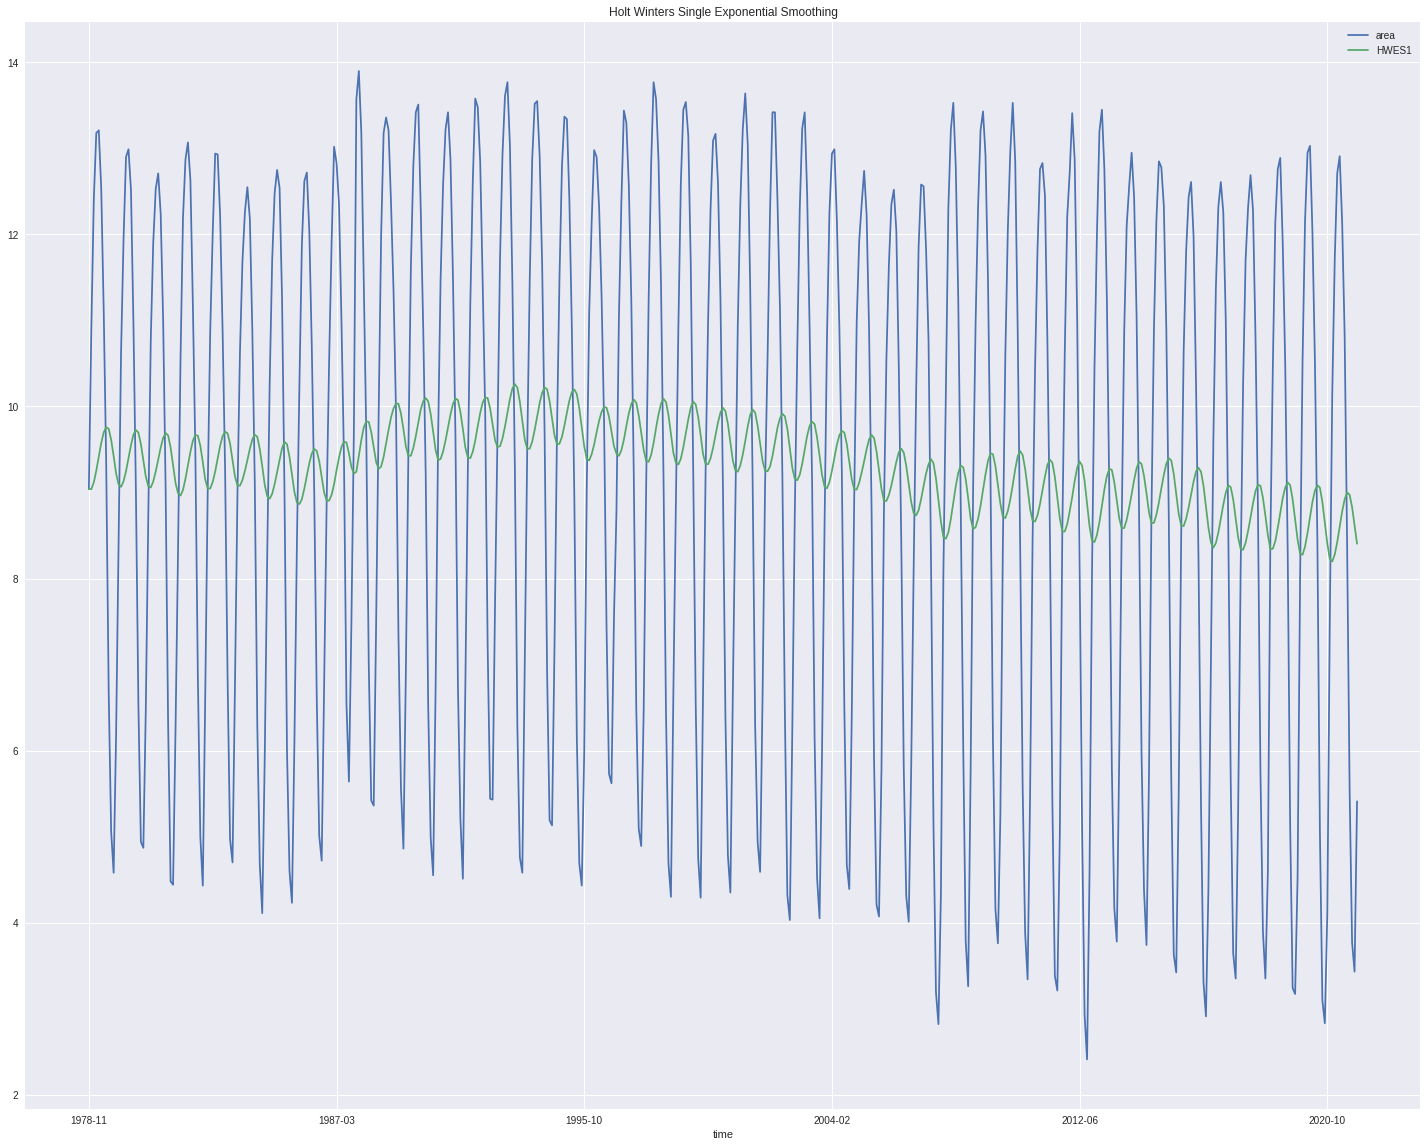

In [ ]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing 
alpha = 1/24
HOLTdf = df.copy()
HOLTdf['HWES1'] = SimpleExpSmoothing(df['area']).fit(smoothing_level=alpha,optimized=False,use_brute=True).fittedvalues
HOLTdf[['area','HWES1']].plot(title='Holt Winters Single Exponential Smoothing', figsize=(25,20));

The plot above shows us that our Single Exponential Smoothing(ES) was not accurate with our data. This makes sense because Single SE does not work for data with Seasonality.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  The location of the key
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  The location of the key
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.


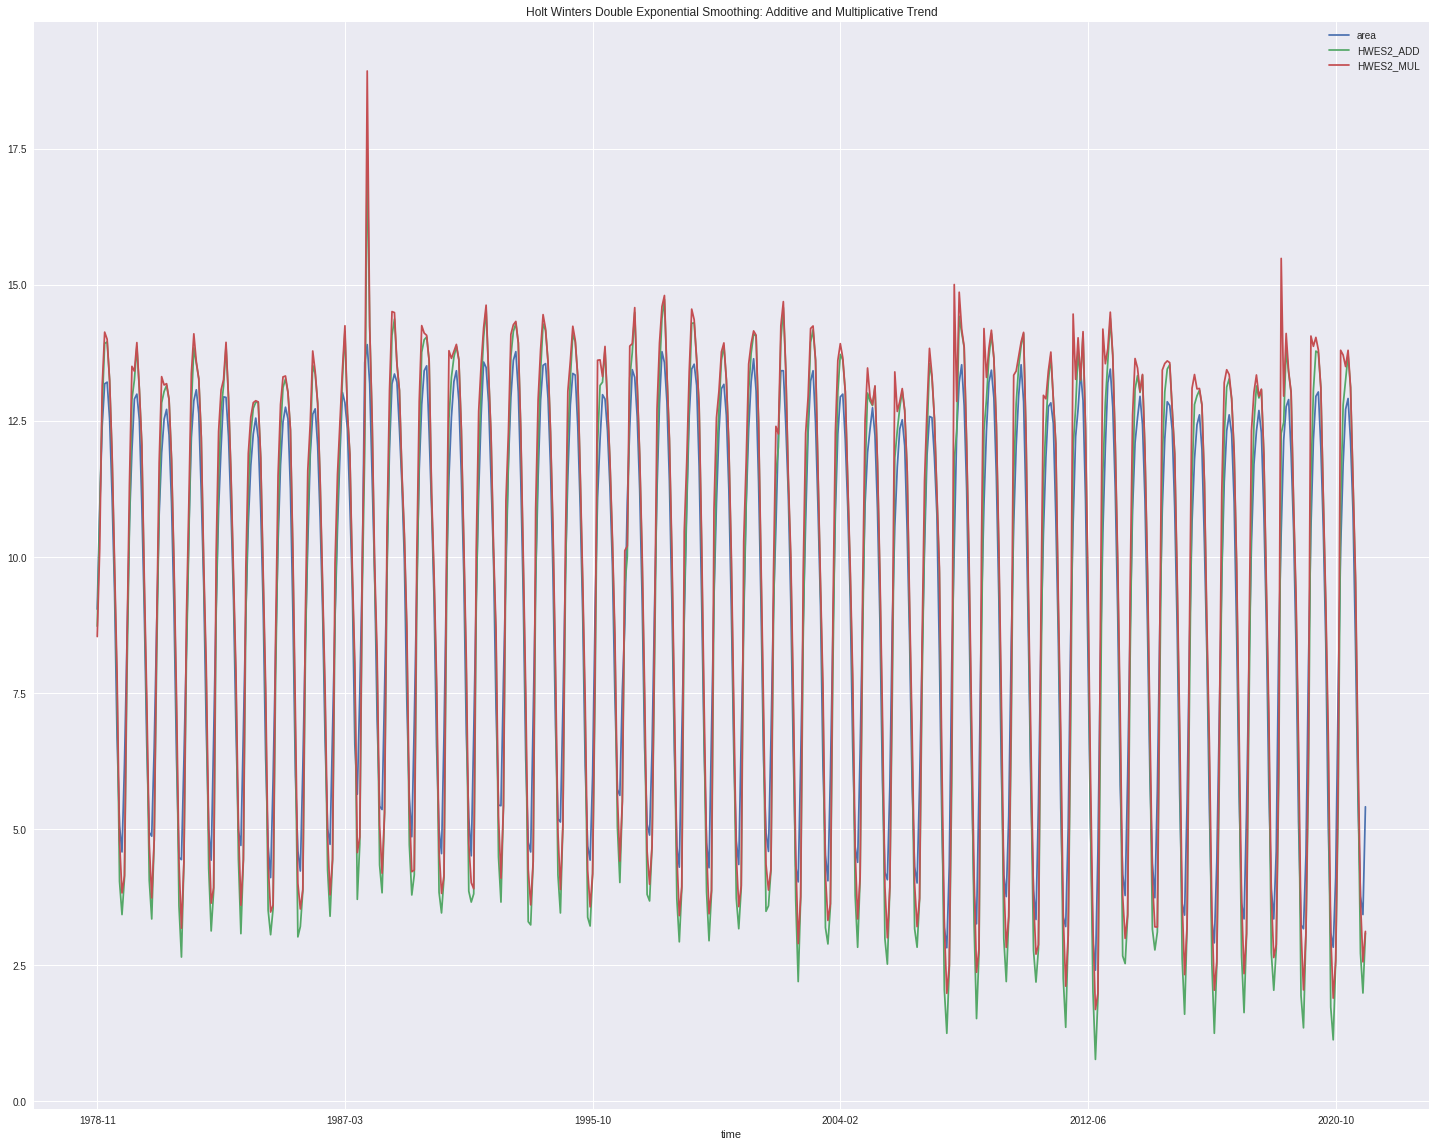

In [ ]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
HOLTdf['HWES2_ADD'] = ExponentialSmoothing(df['area'],trend='add').fit().fittedvalues
HOLTdf['HWES2_MUL'] = ExponentialSmoothing(df['area'],trend='mul').fit().fittedvalues
HOLTdf[['area','HWES2_ADD','HWES2_MUL']].plot(title='Holt Winters Double Exponential Smoothing: Additive and Multiplicative Trend',figsize=(25,20));

The plot above uses Double ES on both Additive and Multiplicative trends. This works much better than Single ES, but it can still be improved because of the data's seasonality.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  The location of the key
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  The location of the key
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.


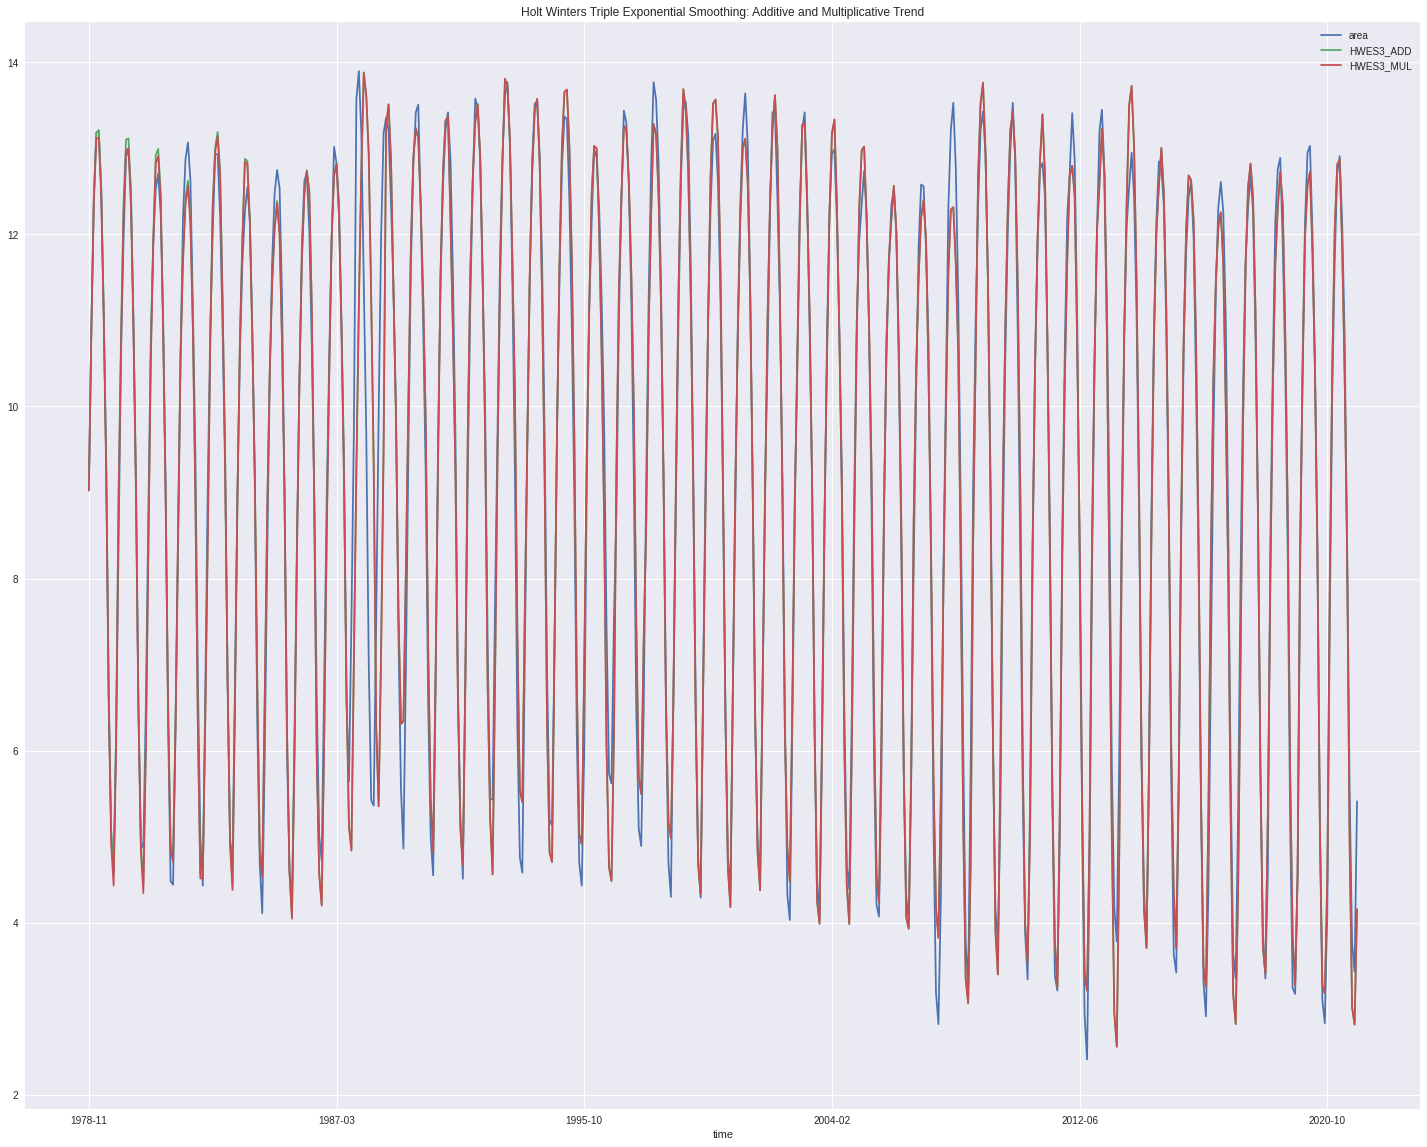

In [ ]:
HOLTdf['HWES3_ADD'] = ExponentialSmoothing(df['area'],trend='add', seasonal = 'add', seasonal_periods= 12).fit().fittedvalues
HOLTdf['HWES3_MUL'] = ExponentialSmoothing(df['area'],trend='mul', seasonal = 'add', seasonal_periods= 12).fit().fittedvalues
HOLTdf[['area','HWES3_ADD','HWES3_MUL']].plot(title='Holt Winters Triple Exponential Smoothing: Additive and Multiplicative Trend',figsize=(25,20));

Finally, we see that Triple ES has the best fit of the three exponential smoothing methods becuase it takes seasonality into account.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  The location of the key
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  The location of the key
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.


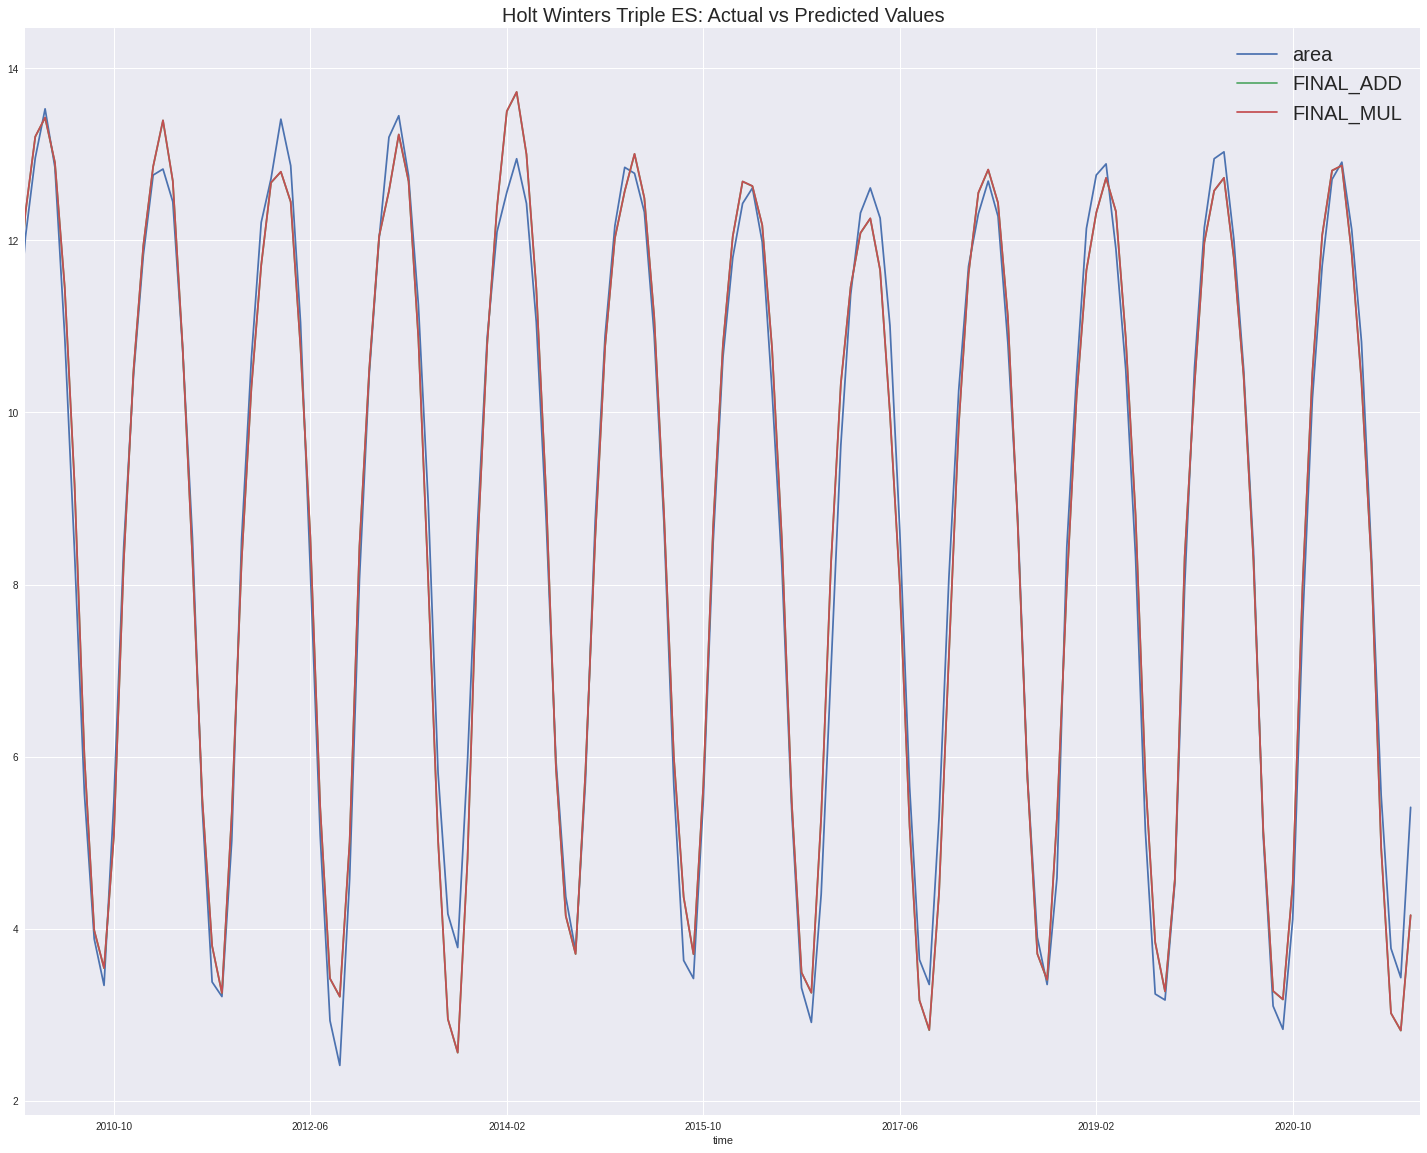

In [ ]:
HOLTdf['FINAL_ADD'] = ExponentialSmoothing(df['area'],trend='add', seasonal = 'add', seasonal_periods= 12).fit().fittedvalues
HOLTdf['FINAL_MUL'] = ExponentialSmoothing(df['area'],trend='mul', seasonal = 'add', seasonal_periods= 12).fit().fittedvalues
ax2 = HOLTdf[['area','FINAL_ADD','FINAL_MUL']].plot(title='Holt Winters Triple Exponential Smoothing: Additive and Multiplicative Trend',figsize=(25,20), xlim = (371,513));
ax2.set_title('Holt Winters Triple ES: Actual vs Predicted Values', fontsize=20)
ax2.legend(fontsize=20)

In [ ]:
mse1 = sklearn.metrics.mean_squared_error(HOLTdf.area, HOLTdf.FINAL_ADD)
mse2 = sklearn.metrics.mean_squared_error(HOLTdf.area, HOLTdf.FINAL_MUL)

rmse1 = math.sqrt(mse1)
rmse2 = math.sqrt(mse2)
print(rmse1, rmse2)

0.7636355337654871 0.7640597189595363


We can see in our plot above that our Holt-Winters Model is decently accurate. In addition, our Root Mean Squared Error for both the additive and multiplicative trends are around .76 which is a pretty good score and much better than our ARIMA model.

#Conclusions
We modeled our time series data and made predictions using both ARIMA and Holt-Winters. Holt-Winters was definitely more accurate, and we can see this reflected in the graphs and the Root Mean Squared Errors. Our ARIMA model looked decent, but it was not actually very accurate. Overall, both models were successful in solving our business problem which was to prove historical trends. Depending on who the models are being presented to, the ARIMA model could be enough to prove historical trends. Regardless, the Holt-Winters model shows an even stronger correlation which would provide even stronger evidence in support of political again against climate change. Furthermore, we can use both models to show that this trend will continue over time.